# A linear regression learning algorithm example using TensorFlow library.

Linear regression model is one of the simplest regression models. It assumes linear relationship between X and Y. The output equation is defined as follows:
$$\hat{y} = WX + b$$


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [12]:
#  Training Parameters
learning_rate = 1e-1
training_epochs = 2000
display_step = 200

200
(200, 1) (200, 1)


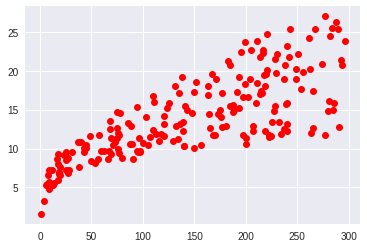

In [13]:
# Load data. Advertising dataset from "An Introduction to Statistical Learning",
# textbook by Gareth James, Robert Tibshirani, and Trevor Hastie 
import numpy as np
data = pd.read_csv('https://raw.githubusercontent.com/DataScienceUB/DeepLearningfromScratch2017/master/dataset/Advertising.csv',index_col=0, delimiter=',')
train_X = data[['TV']].values 

train_Y = data.Sales.values 
train_Y = train_Y[:,np.newaxis]

n_samples = train_X.shape[0]
print n_samples
print train_X.shape, train_Y.shape
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.show()

In [14]:
import tensorflow as tf
# Define tf Graph Inputs
X = tf.placeholder("float",[None,1])
y = tf.placeholder("float",[None,1])

# Create Model variables 
# Set model weights
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

# Construct a linear model
y_pred = tf.add(tf.multiply(X, W), b)

# Minimize the squared errors
cost = tf.reduce_sum(tf.pow(y_pred-y,2))/(n_samples) #L2 loss

# Define the optimizer
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost) #Gradient descent

Epoch: 0001 cost= 9454.903320312 W= -0.49233034 b= 0.93602836
Epoch: 0201 cost= 15.213056564 W= 0.06944617 b= 2.724759
Epoch: 0401 cost= 12.311044693 W= 0.061090976 b= 4.367986
Epoch: 0601 cost= 10.993334770 W= 0.054544155 b= 5.6550035
Epoch: 0801 cost= 10.603803635 W= 0.05058813 b= 6.4327087
Epoch: 1001 cost= 10.524839401 W= 0.048652414 b= 6.8132467
Epoch: 1201 cost= 10.513781548 W= 0.04787619 b= 6.9658427
Epoch: 1401 cost= 10.512723923 W= 0.047621492 b= 7.0159125
Epoch: 1601 cost= 10.512657166 W= 0.04755375 b= 7.02923
Epoch: 1801 cost= 10.512653351 W= 0.047539372 b= 7.0320573
Optimization Finished!
cost= 10.512653 W= 0.04753697 b= 7.0325284


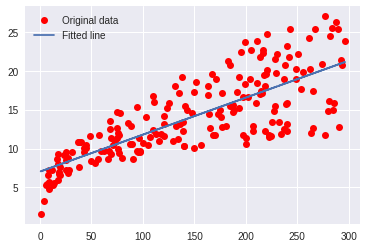

In [15]:
# Initializing the variables
init = tf.global_variables_initializer()
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        sess.run(optimizer, feed_dict={X: train_X, y: train_Y})       

        #Display logs per epoch step
        if epoch % display_step == 0:
            print "Epoch:", '%04d' % (epoch+1), "cost=", \
                "{:.9f}".format(sess.run(cost, feed_dict={X: train_X, y:train_Y})), \
                "W=", sess.run(W), "b=", sess.run(b)

    print "Optimization Finished!"
    print "cost=", sess.run(cost, feed_dict={X: train_X, y: train_Y}), \
          "W=", sess.run(W), "b=", sess.run(b)

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

### Multiple Linear Regression
Let's use three features as input vector : TV,Radio,Newspaper

In [16]:
# Parameters
learning_rate = 1e-2
training_epochs = 2000
display_step = 200

In [17]:
import numpy as np
data = pd.read_csv('https://raw.githubusercontent.com/DataScienceUB/DeepLearningfromScratch2017/master/dataset/Advertising.csv',index_col=0, delimiter=',')
train_X = data[['TV','Radio','Newspaper']].values
train_Y = data.Sales.values 
train_Y = train_Y[:,np.newaxis]
n_samples = train_X.shape[0]
print n_samples
print train_X.shape, train_Y.shape


200
(200, 3) (200, 1)


In [18]:
# Define tf Graph Inputs
X = tf.placeholder("float",[None,3])
y = tf.placeholder("float",[None,1])

# Create Model variables 
# Set model weights
W = tf.Variable(tf.zeros([3, 1]),name="bias")
b = tf.Variable(np.random.randn(), name="bias")

# Construct a linear model
y_pred = tf.matmul(X, W) + b

In [19]:
# Minimize the squared errors
cost = tf.reduce_sum(tf.pow(y_pred-y,2))/(2*n_samples) #L2 loss

# Define the optimizer
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost) #Gradient descent

In [20]:
# Initializing the variables
init = tf.global_variables_initializer()
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        sess.run(optimizer, feed_dict={X: train_X, y: train_Y})
        
        #Display logs per epoch step
        if epoch % display_step == 0:
            print "Epoch:", '%04d' % (epoch+1), "cost=", \
                "{:.9f}".format(sess.run(cost, feed_dict={X: train_X, y:train_Y})), \
                "W=", sess.run(W), "b=", sess.run(b)

    print "Optimization Finished!"
    print "cost=", sess.run(cost, feed_dict={X: train_X, y: train_Y}), \
          "W=", sess.run(W), "b=", sess.run(b)
    

Epoch: 0001 cost= 86.326835632 W= [[0.01]
 [0.01]
 [0.01]] b= -0.35885254
Epoch: 0201 cost= 2.007852077 W= [[0.05367266]
 [0.22218329]
 [0.01653813]] b= 0.03463026
Epoch: 0401 cost= 1.816062450 W= [[0.05232672]
 [0.21644714]
 [0.01354946]] b= 0.52897114
Epoch: 0601 cost= 1.649169564 W= [[0.05087486]
 [0.21026522]
 [0.01032231]] b= 1.0622686
Epoch: 0801 cost= 1.530633807 W= [[0.0495164 ]
 [0.20448473]
 [0.00730258]] b= 1.5611866
Epoch: 1001 cost= 1.458390474 W= [[0.04836035]
 [0.19956744]
 [0.00473274]] b= 1.9857281
Epoch: 1201 cost= 1.420098186 W= [[0.04745222]
 [0.19570553]
 [0.002714  ]] b= 2.3192055
Epoch: 1401 cost= 1.402437091 W= [[0.04679121]
 [0.19289485]
 [0.00124457]] b= 2.5619335
Epoch: 1601 cost= 1.395387888 W= [[0.04634581]
 [0.19100101]
 [0.00025444]] b= 2.7254863
Epoch: 1801 cost= 1.392974496 W= [[ 0.04606894]
 [ 0.18982378]
 [-0.00036105]] b= 2.827155
Optimization Finished!
cost= 1.3922757 W= [[ 0.04591151]
 [ 0.18915443]
 [-0.00071103]] b= 2.8849626
